In [17]:
import cv2 
import matplotlib.pyplot as plt
import numpy as np
import tomasi_kanade as tk
from visualization import plot3d, plot_result
from random import seed
import math

In [18]:
# collecting video frames
frames = []
cap = cv2.VideoCapture("/Users/max/Desktop/Swifty/data/indoor_hallway/video.avi")

if not cap.isOpened():
    print("Error: Could not open video file")
else:
    while True:
        ret, frame = cap.read()
        # trigger for EOL
        if not ret: break
        frames.append(frame)
cap.release()

# frame selection
# collecting just the first second
frames = [frames[600], frames[610]]

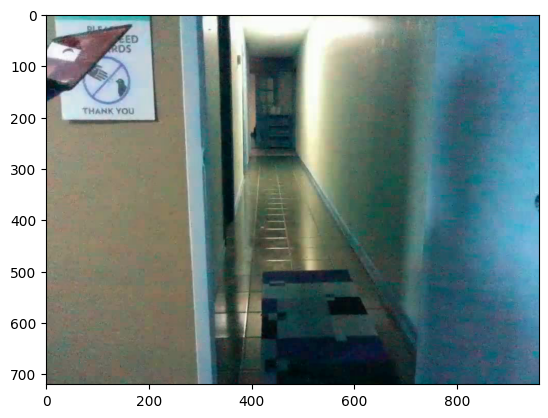

In [4]:
plt.imshow(frames[0])

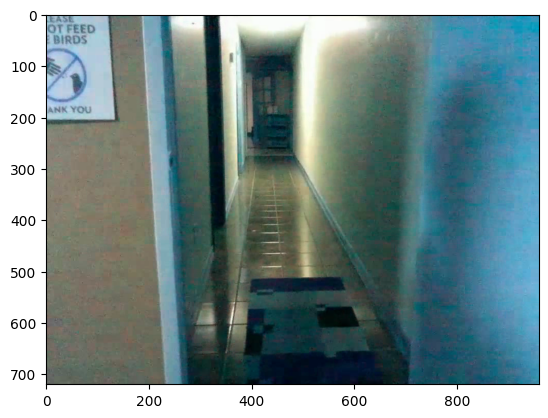

In [5]:
plt.imshow(frames[1])

In [22]:
# creating features
# initializing ORB feature detector
orb = cv2.ORB_create()

# collecting features across all 5 frames
features = []
for f in frames:
    kpi, di = orb.detectAndCompute(f, None)
    features.append((kpi, di))

# FLANN parameters.
FLANN_INDEX_LSH = 6
index_params= dict(algorithm = FLANN_INDEX_LSH,
                   table_number = 6, # 12
                   key_size = 12,     # 20
                   multi_probe_level = 1) #2
search_params = dict(checks=100) 

# feature matrix
good = []
# match matrix
mm = []

# feature matching
for f in range(len(frames)-1):
    flann = cv2.FlannBasedMatcher(index_params,search_params)
    mm.append(flann.knnMatch(features[f][1],features[f+1][1], k=2))

pts1 = []
pts2 = []
# selecting only good matches across all frames
for f in range(len(frames)-1):
    for i,(m,n) in enumerate(mm[f]):
        if m.distance < 0.7*n.distance:
            good.append((f, m))
            # for two frames only
            pts1.append(features[0][0][m.queryIdx].pt)
            pts2.append(features[1][0][m.trainIdx].pt)

# camera settings
x = 800 / 2
y = 600 / 2

fov = 80 * (math.pi / 180) # check
f_x = x / math.tan(fov / 2)
f_y = y / math.tan(fov / 2)

# intrinsic camera matrix
K = np.array([[f_x, 0, x],
                [0, f_y, y],
                [0, 0, 1]])

# finding the essential matrix
pts1 = np.int32(pts1)
pts2 = np.int32(pts2)
E, mask = cv2.findEssentialMat(pts2,pts1,)

# We select only inlier points
pts1 = pts1[mask.ravel()==1]
pts2 = pts2[mask.ravel()==1]

# rotation matrix and translation vector
points, R, t, mask = cv2.recoverPose(E, np.float32(pts2), np.float32(pts1), K, 500)

# calculating the extrinsic matrix
C = np.hstack((R, t))

lm_xyz = []
cam_pos = []

#calculate the landmark positions
for i in range(len(pts2)):
    #convert coordinates into a 3x1 array
    pts2d = np.asmatrix([pts2[i][0], pts2[i][1], 1]).T
    #calculate camera matrix
    P = np.asmatrix(K) * np.asmatrix(C)
    #find 3d coordinate
    pts3d = np.asmatrix(P).I * pts2d
    #add to list of landmarks
    # lm_xyz.append([pts3d[0][0] * self.scale + self.camPose[0],
    #                     pts3d[1][0] * self.scale + self.camPose[1],
    #                     pts3d[2][0] * self.scale + self.camPose[2]])
    lm_xyz.append([pts3d[0][0], pts3d[1][0], pts3d[2][0]])

#update the previous camera position
# self.camPose = [self.camPose[0] + t[0], self.camPose[1] + t[1], self.camPose[2] + t[2]]
cam_pos.append([t[0], t[1], t[2]])

# flattening the matches, tracking the descriptors
# flat = {hash((f,features[f][1][g.queryIdx].tobytes())) : hash((f+1, features[f+1][1][g.trainIdx].tobytes())) for f,g in good}

IndexError: list index out of range

In [23]:
pts2[-1]

array([401, 519], dtype=int32)

In [13]:
R,t,Vh = np.linalg.svd(F)
R

array([[ 5.63815787e-03,  1.02269166e-01, -9.94740785e-01],
       [-4.69532220e-02, -9.93632359e-01, -1.02421338e-01],
       [-9.98881177e-01,  4.72837526e-02, -8.00389260e-04]])

In [16]:
Vh

array([[-3.01298029e-03,  4.95763485e-02, -9.98765792e-01],
       [ 7.59621212e-02, -9.95873210e-01, -4.96619228e-02],
       [-9.97106152e-01, -7.60179985e-02, -7.65378236e-04]])

In [23]:
features[0][0][0].pt

(795.0, 32.0)

In [8]:
# seems like descriptors are unique, good. 
_, desc = zip(*features)
f_desc = []
for a in desc:
    for i in a:
        f_desc.append(hash(i.tobytes()))

In [9]:
# create BFMatcher object
# bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
# # Match descriptors.
# matches = bf.match(features[0][1], features[1][1])
# # Sort them in the order of their distance.
# matches = sorted(matches, key = lambda x:x.distance)

# # cv.drawMatchesKnn expects list of lists as matches.
# img3 = cv2.drawMatches(frames[39],features[39][0],frames[40],features[40][0], matches, None,flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
# plt.imshow(img3),plt.show()

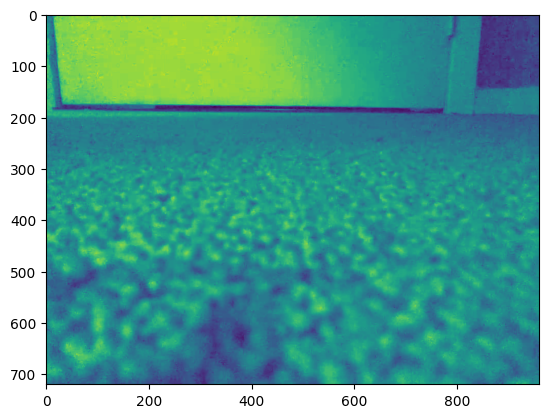

In [22]:
plt.imshow(img2)

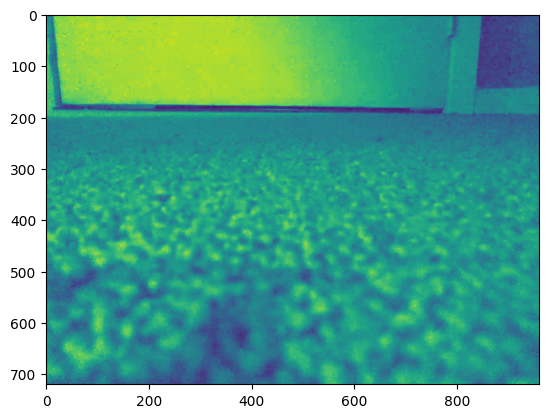

In [21]:
plt.imshow(img1)

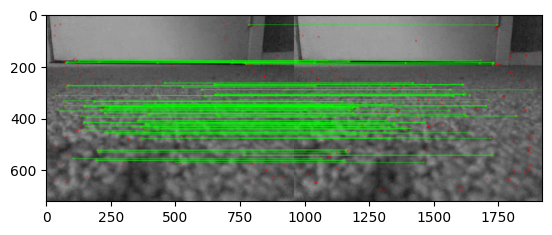

(<matplotlib.image.AxesImage at 0x1506d8150>, None)

In [19]:
# uncommented for testing later in the notebook
img1 = frames[0]
img2 = frames[1]

img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

# initializing ORB
orb = cv2.ORB_create()

kp1, d1 = orb.detectAndCompute(img1, None)
kp2, d2 = orb.detectAndCompute(img2, None)

# FLANN parameters.
FLANN_INDEX_LSH = 6
index_params= dict(algorithm = FLANN_INDEX_LSH,
                   table_number = 6, # 12
                   key_size = 12,     # 20
                   multi_probe_level = 1) #2
search_params = dict(checks=100) 

# feature matching
flann = cv2.FlannBasedMatcher(index_params,search_params)
matches = flann.knnMatch(d1,d2,k=2)

# selecting only good matches.
matchesMask = [[0,0] for i in range(len(matches))]

for i,(m,n) in enumerate(matches):
    if m.distance < 0.7*n.distance:
        matchesMask[i]=[1,0]

draw_params = dict(matchColor = (0,255,0),
                   singlePointColor = (255,0,0),
                   matchesMask = matchesMask,
                   flags = cv2.DrawMatchesFlags_DEFAULT)

img3 = cv2.drawMatchesKnn(img1,kp1,img2,kp2,matches,None,**draw_params)
plt.imshow(img3,),plt.show()

In [ ]:
print(matches[0][1].queryIdx, matches[0][1].trainIdx)

0 221


In [ ]:
pt1 = cv2.KeyPoint_convert(keypoints_1)
pt2 = cv2.KeyPoint_convert(keypoints_2)

print(pt1[265], pt2[309])

[416.79367 277.86243] [138.93121 400.20486]


In [ ]:
# Archived code

# tracking good matches across frames
# minimum 2 frames
m_track = []
frame_num = len(frames)
for f,g in good:
    # storing descriptor hashes in temporary list
    tlist = []
    gkey = hash((f,features[f][1][g.queryIdx].tobytes()))
    if flat[gkey] not in flat.keys(): 
        print("first feature is bad")
        continue
    else:
        # there is a chance the starting key was valid!
        tlist.append(gkey)
        # ripples through the rest of the set
        key = flat[gkey]
        count = 1
        while count <= frame_num:
            if flat[key] not in flat.keys(): break
            # good key, appending to temp list
            tlist.append(key)
            key = flat[key]
            count += 1
        if count == frame_num:
            m_track.append(tlist)